# Introduction

Titanic disaster in one of the deadliest disasters in history. Among more than 2,000 passengers and crew aboard, more than 1,500 people died. If you have watched the movie "Titanic", you may be familiar with the disater.
There are not enought lifeboats aboard, which causes the huge amount of death. Therefore, being in the lifeboats is the key to survive. In the movie, people tend to send women and children to lifeboats and let them survive, but is it true in the real life? The purpose of this project is to predict who will survive in this disaster.

## Data

The dataset can be found [here](https://www.kaggle.com/c/titanic/data), including:

* training set (train.csv)
* test set (test.csv)

### Features

* pclass - Ticket class (1 = Upper, 2 = Middle, 3 = Lower)
* sex - Sex	
* Age - in years (fractional if less than 1. If the age is estimated, is it in the form of xx.5)
* sibsp	- # of siblings / spouses aboard the Titanic	
  * sibling - brother, sister, stepbrother, stepsister
  * spouses - husband, wife (mistresses and fiancés were ignored)
* parch	- # of parents / children aboard the Titanic	
* ticket - Ticket number	
* fare - Passenger fare	
* cabin - Cabin number	
* embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Label

* survival - Survival (0 = No, 1 = Yes)

# Getting Started

To begin working with the data, we need to first install all the necessary modules, and then load the data into a pandas DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')

# Explore the dataset

Let's explore this dataset a little bit, and find some interesting facts that could help with the prediction. Meanwhile, it is also important to remove outliers and clean up "NaN".

## Overall Dataset

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Single Variable

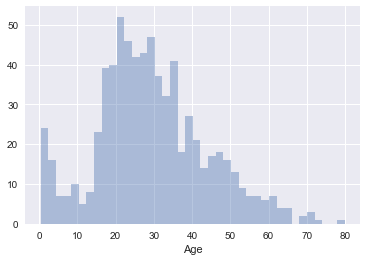

In [18]:
sns.distplot(train['Age'].dropna(), kde=False, bins=40)

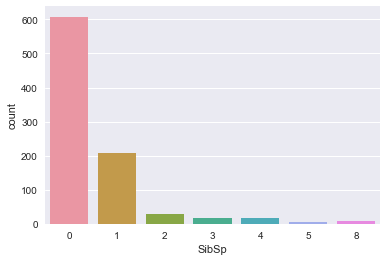

In [20]:
sns.countplot(data=train, x='SibSp')

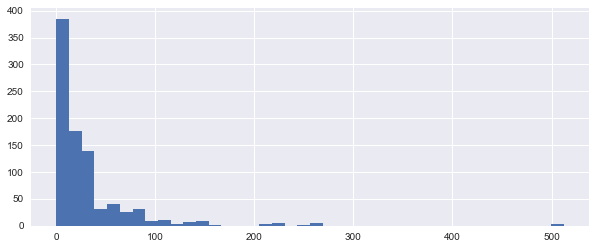

In [23]:
train['Fare'].hist(bins=40,figsize=(10, 4))

## Multiple Variables

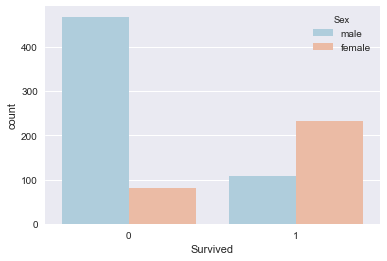

In [13]:
sns.countplot(data=train, x='Survived', hue='Sex', palette='RdBu_r')

Based on this plot, females are more likely to survive than male.

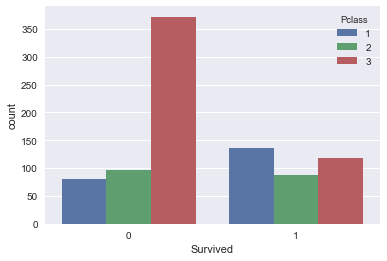

In [15]:
sns.countplot(data=train, x='Survived', hue='Pclass')

Based on thsi plot, Upper and Middle class passengers are more likely to survive.

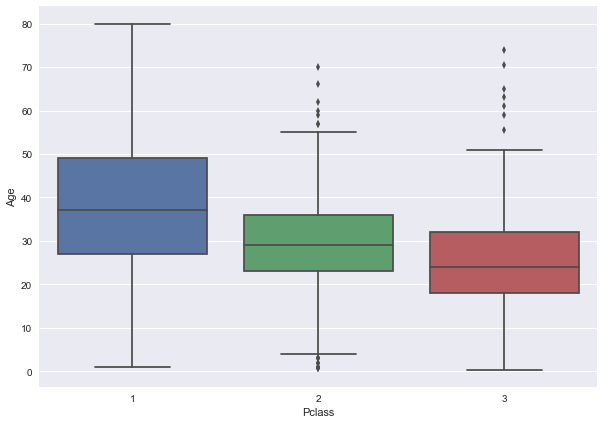

In [26]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=train, x='Pclass', y='Age')

It seems that Upper class customer is generally older than Middle class and Lower class.

## Missing Information

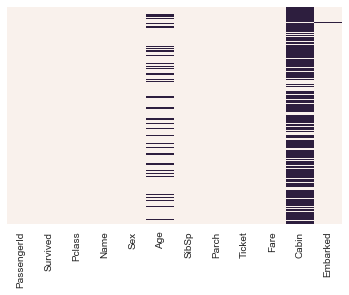

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

It seems that there are little information missing on `Embarked`column, some information missing on `Age` column, and a lot of information missing on `Cabin` column.

### Imputation the Age variable

Age can be very helpful in the prediction, therefore, we need to find a way to fill those missing information. From the previous exploration, we can see that average ages are different among different classes. We can seperate passengers by their class, and fill in the missing age by the average age per class.

In [33]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return np.mean(train[train['Pclass'] == 1]['Age'])
        elif pclass == 2:
            return np.mean(train[train['Pclass'] == 2]['Age'])
        else:
            return np.mean(train[train['Pclass'] == 3]['Age'])
    else:
        return age

In [35]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cba)